In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers

/home/Yavnege/programs/anaconda3/envs/ML/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
import matplotlib.pyplot as plt

In [22]:
raw_train_data = pd.read_csv('internship_train.csv')
raw_test_data = pd.read_csv('internship_hidden_test.csv')
raw_test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,259,388,402,340,156,382,3.316625,0.218760,1,164,...,7.163474,10.227235,0.889111,9.190222,4.670908,0.931525,7.634177,0.158196,13.432551,2.511191
1,441,192,381,421,452,123,-8.888194,0.700228,0,349,...,10.619064,9.339161,4.221861,0.595563,13.865748,0.328453,11.507599,9.107966,1.302407,11.105604
2,83,129,107,156,247,191,2.645751,0.494556,1,297,...,1.819890,10.670237,10.350867,5.134417,5.898995,8.374986,4.638049,3.160023,2.243799,5.073030
3,183,438,191,116,491,403,-6.164414,0.511117,0,272,...,4.168135,12.782579,0.513072,0.321295,11.334062,11.735511,1.911520,8.365676,4.877288,11.601819
4,449,156,310,188,279,465,8.000000,0.756416,1,90,...,7.908122,1.140498,14.165074,7.688796,5.079241,8.152186,1.680403,13.215111,5.823109,1.038015


# check data and preprocessing

In [24]:
raw_train_data.isna().sum().head()
raw_test_data.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
dtype: int64

In [6]:
train_data_X = raw_train_data.drop(["target"], axis = 1)
train_data_X

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,236,488,16,221,382,97,-4.472136,0.107472,0,132,...,10.125020,13.340874,0.870542,1.962937,7.466666,11.547794,8.822916,9.046424,7.895535,11.010677
1,386,206,357,232,1,198,7.810250,0.763713,1,143,...,10.584802,12.484882,7.168680,2.885415,12.413973,10.260494,10.091351,9.270888,3.173994,13.921871
2,429,49,481,111,111,146,8.602325,0.651162,1,430,...,10.273114,14.030257,0.394970,8.160625,12.592059,8.937577,2.265191,11.255721,12.794841,12.080951
3,414,350,481,370,208,158,8.306624,0.424645,1,340,...,6.885179,2.789577,6.416708,10.549814,11.456437,6.468099,2.519049,0.258284,9.317696,5.383098
4,318,359,20,218,317,301,8.124038,0.767304,1,212,...,11.162686,1.886560,1.919999,2.268203,0.149421,4.105907,10.416291,6.816217,8.586960,4.512419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,328,44,320,364,7,73,4.898979,0.563878,1,315,...,5.252173,0.266362,6.185887,7.716837,10.144664,1.711649,3.849704,12.401903,14.195540,2.371207
89996,217,472,174,327,255,389,-3.605551,0.861690,0,144,...,14.736929,5.147059,4.209660,14.482770,1.375031,6.386263,10.107582,12.637902,6.576331,6.863238
89997,189,406,213,57,494,190,6.164414,0.633704,1,221,...,7.296410,14.902807,2.886534,8.683168,4.522339,1.556421,10.971184,7.792226,8.422623,3.041409
89998,418,478,163,35,390,77,-3.605551,0.687309,0,289,...,13.943818,12.743029,2.525611,11.050145,6.589943,12.622192,10.596839,0.647584,8.746364,1.246682


In [7]:
train_data_X.describe().transpose()[['mean', 'std']]

,mean,std
0,249.423944,144.336393
1,250.236267,144.022200
2,248.637289,144.107577
3,249.736600,144.284945
4,249.436178,143.941581
5,249.656167,144.329168
6,-0.011402,7.038171
7,0.498548,0.288682
8,0.499189,0.500002
9,249.842033,144.612718


In [8]:
train_data_Y = raw_train_data["target"]
train_data_Y

0        20.107472
1        61.763713
2        74.651162
3        69.424645
4        66.767304
           ...    
89995    24.563878
89996    13.861690
89997    38.633704
89998    13.687309
89999    59.613207
Name: target, Length: 90000, dtype: float64

# Normalization layer

In [9]:
normalizer = tf.keras.layers.Normalization(axis = -1)
normalizer.adapt(np.array(train_data_X))

2022-09-11 16:09:03.771145: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-11 16:09:03.786712: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [10]:
print(normalizer.mean)

tf.Tensor(
[[ 2.4942432e+02  2.5023592e+02  2.4863756e+02  2.4973643e+02
   2.4943654e+02  2.4965596e+02 -1.1401590e-02  4.9854782e-01
   4.9918923e-01  2.4984238e+02  2.4981926e+02  2.4934685e+02
   2.4990024e+02  7.4839301e+00  7.4980378e+00  7.4962516e+00
   7.5016379e+00  7.4864712e+00  7.5230470e+00  7.4755869e+00
   7.4948378e+00  7.5039477e+00  7.5077348e+00  7.5086780e+00
   7.4724240e+00  7.5192099e+00  7.5157537e+00  7.5094070e+00
   7.4967794e+00  7.5040240e+00  7.4942069e+00  7.4907975e+00
   7.4869390e+00  7.5145149e+00  7.4916267e+00  7.5201955e+00
   7.5078096e+00  7.4937062e+00  7.5138507e+00  7.5070324e+00
   7.4795780e+00  7.5198421e+00  7.5024824e+00  7.5129604e+00
   7.4751582e+00  7.5239682e+00  7.5083981e+00  7.4733295e+00
   7.4906645e+00  7.4745836e+00  7.5092125e+00  7.4871540e+00
   7.5133181e+00]], shape=(1, 53), dtype=float32)


In [11]:
first = np.array(train_data_X[:1])
print(normalizer(first))

tf.Tensor(
[[-9.3008019e-02  1.6509008e+00 -1.6143486e+00 -1.9916646e-01
   9.2096204e-01 -1.0577034e+00 -6.3379735e-01 -1.3547041e+00
  -9.9839228e-01 -8.1489122e-01  2.1598884e-01  5.9978086e-01
  -1.0456735e+00 -8.3212727e-01 -1.3200749e+00 -9.7812498e-01
   1.0655304e+00 -1.0178610e+00 -4.3778110e-01 -6.9540423e-01
  -1.1521783e+00 -3.5131174e-01 -6.8471646e-01  1.2085692e+00
   1.1880980e+00 -7.9946220e-01  9.9483812e-01 -9.0997946e-01
   1.3665130e+00  1.7315736e-01 -1.2031461e+00  1.6988802e+00
  -1.7102940e+00 -1.0482744e+00 -5.2338374e-01 -1.4550432e+00
  -4.7352977e-02 -9.4873078e-02 -9.0077275e-01  6.0189899e-02
   8.0921941e-02  2.0287569e-01 -1.3657117e+00  6.0326266e-01
   1.3545531e+00 -1.5396131e+00 -1.2801986e+00 -1.5368684e-03
   9.3653089e-01  3.1189764e-01  3.5531640e-01  9.4426915e-02
   8.0713731e-01]], shape=(1, 53), dtype=float32)


# Model build and compile

In [12]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=[tf.keras.metrics.RootMeanSquaredError()]
                )
  return model

In [13]:
dnn_model = build_and_compile_model(normalizer)

In [14]:
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 53)               107       
 n)                                                              
                                                                 
 dense (Dense)               (None, 64)                3456      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 7,788
Trainable params: 7,681
Non-trainable params: 107
_________________________________________________________________


custom callback

In [15]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('loss') is not None and logs.get('loss') < 0.3:
            print("\nReached 0.3 loss so cancelling training!")
            self.model.stop_training = True

In [16]:
%%time
callbacks = myCallback()
history = dnn_model.fit(
            train_data_X,
            train_data_Y,
            epochs = 30,
            callbacks = [callbacks]
            )

Epoch 1/30
2813/2813 [==============================] - 15s 5ms/step - loss: 11.8096 - root_mean_squared_error: 18.4545
Epoch 2/30
2813/2813 [==============================] - 14s 5ms/step - loss: 1.7513 - root_mean_squared_error: 2.3043
Epoch 3/30
2813/2813 [==============================] - 10s 3ms/step - loss: 0.9643 - root_mean_squared_error: 1.2341
Epoch 4/30
2813/2813 [==============================] - 10s 4ms/step - loss: 0.7601 - root_mean_squared_error: 0.9714
Epoch 5/30
2813/2813 [==============================] - 16s 6ms/step - loss: 0.6692 - root_mean_squared_error: 0.8600
Epoch 6/30
2813/2813 [==============================] - 16s 6ms/step - loss: 0.6292 - root_mean_squared_error: 0.8124
Epoch 7/30
2813/2813 [==============================] - 14s 5ms/step - loss: 0.6002 - root_mean_squared_error: 0.7772
Epoch 8/30
2813/2813 [==============================] - 13s 5ms/step - loss: 0.5945 - root_mean_squared_error: 0.7721
Epoch 9/30
2813/2813 [==============================] 

In [19]:
def plot_loss(history):
  plt.plot(history.history['root_mean_squared_error'], label='root_mean_squared_error')
  #plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  #plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

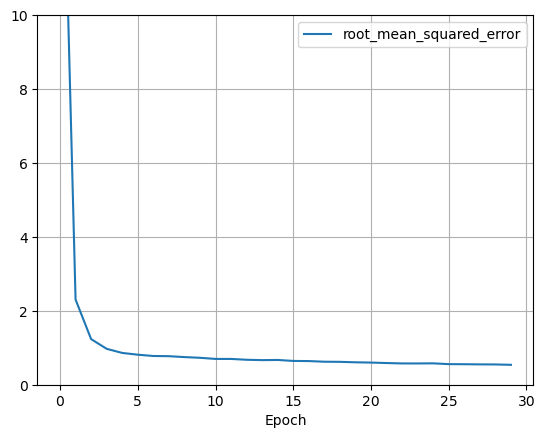

In [20]:
plot_loss(history)

In [21]:
dnn_model.save('dnn_model')

2022-09-11 18:24:25.163765: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: dnn_model/assets


In [28]:
predictions = dnn_model.predict(raw_test_data)
predictions.shape

(10000, 1)

In [32]:
np.savetxt('pred.csv', predictions)